# Census - SexByAge

#### This notebook contains code for gathering Census data tables and converting them to dataframes. 
#### Please use caution when altering this code.

In [1]:
import pandas as pd
from census import Census #<-- Python wrapper for census API
import requests
import os
import matplotlib.pyplot as plt
import matplotlib

# Census API Key
from config import api_key

# provide the api key and the year to establish a session
c = Census(api_key, year=2018)

# Set an option to allow up to 300 characters to print in each column
pd.set_option('max_colwidth', 300)

In [2]:
tables = c.acs5.tables()

# The tables variable contains a list of dicts, so we can convert directly to a dataframe
table_df = pd.DataFrame(tables)

##### The cell below gathering columns names from the Census Total Population table that only contain estimate and are int data types.
##### Those table names are added to a string variable and then pulled from the census data.
##### Dictionary key names are replaced withe more meaningful names.
##### Data is saved to a dataframe and exported as a csv file.

In [18]:
table_id = 'B27001'     

# Capture the variables URL from the table_df
url = table_df.loc[table_df['name']==table_id, 'variables'].values[0]

# Make the API call
response = requests.get(url).json()

# convert the response to a DataFrame
variables = pd.DataFrame(response['variables']).transpose()

print(f"Number of available variables: {len(variables)}")

table_info = variables[(variables['predicateType']=='int') & (variables['label'].str.contains("Estimate"))]   

print(f"Length of table info is {len(table_info)}")



columns_amounts = len(table_info)
table_column_names = []
table_column_labels = []
n = 10
census_data_list = []

# table_info.head()

state_data = c.acs5.get(("NAME"), 
                              {'for': 'state:*'})
census_data_base = pd.DataFrame(state_data)
census_data_base.head()

if columns_amounts > 50:
    for ind in table_info.index: 
        table_column_names.append(ind)
        table_column_labels.append(table_info.loc[ind,'label'])
                                 
    table_column_list = [table_column_names[i * n:(i + 1) * n] for i in range((len(table_column_names) + n - 1) // n )]

    for i in range(len(table_column_list)):
        table_columns = ""
        for j in range(len(table_column_list[i])):
            table_columns = table_columns + f"{table_column_list[i][j]},"
        
        column_list = table_columns[:-1]
#         print(column_list)
        census_data = c.acs5.get(("NAME", column_list), 
                              {'for': 'state:*'})
        census_B27001_part = pd.DataFrame(census_data)
        census_data_all = pd.merge(census_data_base, census_B27001_part, on=['state', 'NAME'], how="left")
        census_data_base = census_data_all

    census_B27001_HealthInsSexByAge_df = census_data_base
    for i in range(len(table_column_names)):
#         print(f'List Value: {table_column_names[i]}, Column Name: {census_B27001_HealthInsSexByAge_df.columns[i+2]}, Label Name: {table_column_labels[i]}')
        census_B27001_HealthInsSexByAge_df = census_B27001_HealthInsSexByAge_df.rename(columns = {census_B27001_HealthInsSexByAge_df.columns[i+2]: table_column_labels[i]}) 
else:
    table_columns = ""
    for ind in table_info.index:       
        table_columns = table_columns + f"{ind},"


    column_list = table_columns[:-1]
    census_data = c.acs5.get(("NAME", column_list), 
                              {'for': 'state:*'})

    for i in range(len(table_info)) : 
        for d in census_data:
            d[table_info.iloc[i, 0]] = d.pop(table_info.index[i]) 

    census_B27001_HealthInsSexByAge_df = pd.DataFrame(census_data)
    

census_B27001_HealthInsSexByAge_df.to_csv("census_B27001_HealthInsSexByAge.csv", encoding="utf-8", index=False )
census_B27001_HealthInsSexByAge_df

Number of available variables: 228
Length of table info is 57


,NAME,state,Estimate!!Total!!Female!!Under 6 years,Estimate!!Total!!Female!!Under 6 years!!With health insurance coverage,Estimate!!Total!!Female,Estimate!!Total!!Male!!55 to 64 years!!No health insurance coverage,Estimate!!Total!!Male!!65 to 74 years,Estimate!!Total!!Male!!55 to 64 years,Estimate!!Total!!Male!!55 to 64 years!!With health insurance coverage,Estimate!!Total!!Male!!75 years and over,...,Estimate!!Total!!Male!!19 to 25 years!!No health insurance coverage,Estimate!!Total!!Male!!26 to 34 years,Estimate!!Total!!Male!!19 to 25 years!!With health insurance coverage,Estimate!!Total!!Male!!35 to 44 years,Estimate!!Total!!Male!!35 to 44 years!!With health insurance coverage,Estimate!!Total!!Male!!26 to 34 years!!With health insurance coverage,Estimate!!Total!!Male!!26 to 34 years!!No health insurance coverage,Estimate!!Total!!Male!!45 to 54 years!!With health insurance coverage,Estimate!!Total!!Male!!35 to 44 years!!No health insurance coverage,Estimate!!Total!!Male!!45 to 54 years
0,Minnesota,27,205046.0,198639.0,2750912.0,15139.0,224335.0,362488.0,347349.0,139624.0,...,23977.0,340724.0,226635.0,342515.0,316191.0,304447.0,36277.0,340302.0,26324.0,360485.0
1,Mississippi,28,111845.0,107787.0,1523423.0,20966.0,120727.0,175972.0,155006.0,69014.0,...,40783.0,155565.0,101960.0,169912.0,132611.0,111268.0,44297.0,144748.0,37301.0,175554.0
2,Missouri,29,216826.0,205077.0,3062934.0,33694.0,257914.0,386060.0,352366.0,160452.0,...,55862.0,346029.0,227479.0,353352.0,298718.0,276054.0,69975.0,331887.0,54634.0,379468.0
3,Montana,30,35956.0,33826.0,512403.0,7998.0,54566.0,73583.0,65585.0,31737.0,...,10285.0,58578.0,39715.0,60413.0,50654.0,46234.0,12344.0,53643.0,9759.0,61952.0
4,Nebraska,31,77083.0,73807.0,943401.0,8704.0,75307.0,117342.0,108638.0,48445.0,...,14784.0,112474.0,78770.0,115502.0,99305.0,93274.0,19200.0,101505.0,16197.0,113709.0
5,Nevada,32,105608.0,98854.0,1448444.0,18008.0,130959.0,175033.0,157025.0,74485.0,...,26981.0,185611.0,99627.0,190986.0,154136.0,142116.0,43495.0,164742.0,36850.0,194189.0
6,New Hampshire,33,37924.0,37030.0,671806.0,6907.0,64706.0,100806.0,93899.0,36281.0,...,8857.0,71503.0,54289.0,75687.0,67932.0,60050.0,11453.0,89446.0,7755.0,98563.0
7,New Jersey,34,307463.0,297620.0,4511395.0,42145.0,349075.0,564880.0,522735.0,226748.0,...,60255.0,498527.0,331614.0,553679.0,467487.0,394700.0,103827.0,551212.0,86192.0,618401.0
8,New Mexico,35,75701.0,72434.0,1049372.0,14432.0,95018.0,128357.0,113925.0,58599.0,...,22227.0,120319.0,79024.0,118400.0,95624.0,92857.0,27462.0,102278.0,22776.0,120470.0
9,New York,36,673424.0,657392.0,10015726.0,72808.0,773617.0,1207958.0,1135150.0,502991.0,...,106762.0,1241239.0,835209.0,1178894.0,1024899.0,1038397.0,202842.0,1161890.0,153995.0,1279080.0


### Census Health Insurance By State By Age Column Changes

In [85]:
census_B27001_HealthInsSexByAge_df.dtypes

#census_B27001_HealthInsSexByAge_df['COUNTYFP'] = census_B27001_HealthInsSexByAge_df['state'] + census_B27001_HealthInsSexByAge_df['county']

census_HealthInsSexByAge_sorted = census_B27001_HealthInsSexByAge_df.sort_values(by=['Estimate!!Total'])
census_HealthInsSexByAge_sorted = census_HealthInsSexByAge_sorted.reset_index(drop=True)

# census_HealthInsSexByAge_sorted['State Name'] = ''
# census_HealthInsSexByAge_sorted['County Name'] = ''


# for index, row in census_HealthInsSexByAge_sorted.iterrows():
#     name_all = row['NAME']
#     name_list = name_all.split(',')
#     clean_state = name_list[1][1:]
#     census_HealthInsSexByAge_sorted.loc[index, 'State Name']= clean_state
#     census_HealthInsSexByAge_sorted.loc[index, 'County Name']= name_list[0]
    
census_HealthInsSexByAge_sorted.head()

,NAME,state,Estimate!!Total!!Female!!Under 6 years,Estimate!!Total!!Female!!Under 6 years!!With health insurance coverage,Estimate!!Total!!Female,Estimate!!Total!!Male!!55 to 64 years!!No health insurance coverage,Estimate!!Total!!Male!!65 to 74 years,Estimate!!Total!!Male!!55 to 64 years,Estimate!!Total!!Male!!55 to 64 years!!With health insurance coverage,Estimate!!Total!!Male!!75 years and over,...,Estimate!!Total!!Male!!19 to 25 years!!No health insurance coverage,Estimate!!Total!!Male!!26 to 34 years,Estimate!!Total!!Male!!19 to 25 years!!With health insurance coverage,Estimate!!Total!!Male!!35 to 44 years,Estimate!!Total!!Male!!35 to 44 years!!With health insurance coverage,Estimate!!Total!!Male!!26 to 34 years!!With health insurance coverage,Estimate!!Total!!Male!!26 to 34 years!!No health insurance coverage,Estimate!!Total!!Male!!45 to 54 years!!With health insurance coverage,Estimate!!Total!!Male!!35 to 44 years!!No health insurance coverage,Estimate!!Total!!Male!!45 to 54 years
0,Wyoming,56,22327.0,20663.0,281743.0,4436.0,26214.0,40268.0,35832.0,14670.0,...,5623.0,35891.0,22211.0,36098.0,29919.0,28136.0,7755.0,29014.0,6179.0,34377.0
1,Vermont,50,17323.0,17033.0,314321.0,1783.0,32709.0,46576.0,44793.0,17866.0,...,2304.0,32480.0,30278.0,34237.0,31527.0,28347.0,4133.0,39089.0,2710.0,42045.0
2,District of Columbia,11,25379.0,24939.0,357389.0,1392.0,19786.0,32288.0,30896.0,12195.0,...,2510.0,65547.0,33248.0,47693.0,44254.0,60799.0,4748.0,35116.0,3439.0,37640.0
3,Alaska,02,32039.0,28933.0,349092.0,6651.0,27405.0,48456.0,41805.0,11122.0,...,9550.0,49428.0,26553.0,44805.0,36209.0,36861.0,12567.0,38491.0,8596.0,47207.0
4,North Dakota,38,31068.0,29261.0,360097.0,3000.0,28826.0,47961.0,44961.0,19149.0,...,4908.0,53343.0,39529.0,44008.0,39537.0,46273.0,7070.0,39669.0,4471.0,43537.0


#### Combine male columns into larger groups

In [86]:
census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!18 and under years!!No'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!Under 6 years!!No health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!6 to 18 years!!No health insurance coverage']
                                                                

census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!19 to 44 years!!No'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!19 to 25 years!!No health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!26 to 34 years!!No health insurance coverage'] +\
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!35 to 44 years!!No health insurance coverage'] 

census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!45 to 64 years!!No'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!45 to 54 years!!No health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!55 to 64 years!!No health insurance coverage']

census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!65 and over years!!No'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!65 to 74 years!!No health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!75 years and over!!No health insurance coverage'] 
                                                                

census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!All Ages!!No']= census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!Under 6 years!!No health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!6 to 18 years!!No health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!19 to 25 years!!No health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!26 to 34 years!!No health insurance coverage'] +\
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!35 to 44 years!!No health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!45 to 54 years!!No health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!55 to 64 years!!No health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!65 to 74 years!!No health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!75 years and over!!No health insurance coverage']



census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!18 and under years!!Yes'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!Under 6 years!!With health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!6 to 18 years!!With health insurance coverage']
                                                                

census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!19 to 44 years!!Yes'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!19 to 25 years!!With health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!26 to 34 years!!With health insurance coverage'] +\
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!35 to 44 years!!With health insurance coverage'] 

census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!45 to 64 years!!Yes'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!45 to 54 years!!With health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!55 to 64 years!!With health insurance coverage']

census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!65 and over years!!Yes'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!65 to 74 years!!With health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!75 years and over!!With health insurance coverage']


census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!All Ages!!Yes'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!Under 6 years!!With health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!6 to 18 years!!With health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!19 to 25 years!!With health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!26 to 34 years!!With health insurance coverage'] +\
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!35 to 44 years!!With health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!45 to 54 years!!With health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!55 to 64 years!!With health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!65 to 74 years!!With health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!75 years and over!!With health insurance coverage']
 

census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!18 and under years'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!Under 6 years'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!6 to 18 years']
                                                                

census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!19 to 44 years'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!19 to 25 years'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!26 to 34 years'] +\
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!35 to 44 years'] 

census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!45 to 64 years'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!45 to 54 years'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!55 to 64 years']

census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!65 and over years'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!65 to 74 years'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!75 years and over'] 


# census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!All Ages'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!Under 6 years'] + \
#                                                                 census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!6 to 18 years'] + \
#                                                                 census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!19 to 25 years'] + \
#                                                                 census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!26 to 34 years'] +\
#                                                                 census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!35 to 44 years'] + \
#                                                                 census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!45 to 54 years'] + \
#                                                                 census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!55 to 64 years'] + \
#                                                                 census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!65 to 74 years'] + \
#                                                                 census_HealthInsSexByAge_sorted['Estimate!!Total!!Male!!75 years and over'] 


census_HealthInsSexByAge_sorted.head()

,NAME,state,Estimate!!Total!!Female!!Under 6 years,Estimate!!Total!!Female!!Under 6 years!!With health insurance coverage,Estimate!!Total!!Female,Estimate!!Total!!Male!!55 to 64 years!!No health insurance coverage,Estimate!!Total!!Male!!65 to 74 years,Estimate!!Total!!Male!!55 to 64 years,Estimate!!Total!!Male!!55 to 64 years!!With health insurance coverage,Estimate!!Total!!Male!!75 years and over,...,Estimate!!Total!!Male!!All Ages!!No,Estimate!!Total!!Male!!18 and under years!!Yes,Estimate!!Total!!Male!!19 to 44 years!!Yes,Estimate!!Total!!Male!!45 to 64 years!!Yes,Estimate!!Total!!Male!!65 and over years!!Yes,Estimate!!Total!!Male!!All Ages!!Yes,Estimate!!Total!!Male!!18 and under years,Estimate!!Total!!Male!!19 to 44 years,Estimate!!Total!!Male!!45 to 64 years,Estimate!!Total!!Male!!65 and over years
0,Wyoming,56,22327.0,20663.0,281743.0,4436.0,26214.0,40268.0,35832.0,14670.0,...,35080.0,69236.0,80266.0,64846.0,40752.0,255100.0,74828.0,99823.0,74645.0,40884.0
1,Vermont,50,17323.0,17033.0,314321.0,1783.0,32709.0,46576.0,44793.0,17866.0,...,15162.0,64893.0,90152.0,83882.0,50486.0,289413.0,66080.0,99299.0,88621.0,50575.0
2,District of Columbia,11,25379.0,24939.0,357389.0,1392.0,19786.0,32288.0,30896.0,12195.0,...,16388.0,64422.0,138301.0,66012.0,31746.0,300481.0,65962.0,148998.0,69928.0,31981.0
3,Alaska,02,32039.0,28933.0,349092.0,6651.0,27405.0,48456.0,41805.0,11122.0,...,57175.0,89843.0,99623.0,80296.0,38077.0,307839.0,100488.0,130336.0,95663.0,38527.0
4,North Dakota,38,31068.0,29261.0,360097.0,3000.0,28826.0,47961.0,44961.0,19149.0,...,30734.0,87638.0,125339.0,84630.0,47803.0,345410.0,94883.0,141788.0,91498.0,47975.0


#### Combine female columns into larger groups

In [87]:
census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!18 and under years!!No'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!Under 6 years!!No health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!6 to 18 years!!No health insurance coverage']
                                                                

census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!19 to 44 years!!No'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!19 to 25 years!!No health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!26 to 34 years!!No health insurance coverage'] +\
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!35 to 44 years!!No health insurance coverage'] 

census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!45 to 64 years!!No'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!45 to 54 years!!No health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!55 to 64 years!!No health insurance coverage']

census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!65 and over years!!No'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!65 to 74 years!!No health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!75 years and over!!No health insurance coverage'] 
                                                                

census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!All Ages!!No']= census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!Under 6 years!!No health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!6 to 18 years!!No health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!19 to 25 years!!No health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!26 to 34 years!!No health insurance coverage'] +\
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!35 to 44 years!!No health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!45 to 54 years!!No health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!55 to 64 years!!No health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!65 to 74 years!!No health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!75 years and over!!No health insurance coverage']








census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!18 and under years!!Yes'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!Under 6 years!!With health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!6 to 18 years!!With health insurance coverage']
                                                                

census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!19 to 44 years!!Yes'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!19 to 25 years!!With health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!26 to 34 years!!With health insurance coverage'] +\
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!35 to 44 years!!With health insurance coverage'] 

census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!45 to 64 years!!Yes'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!45 to 54 years!!With health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!55 to 64 years!!With health insurance coverage']

census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!65 and over years!!Yes'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!65 to 74 years!!With health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!75 years and over!!With health insurance coverage']


census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!All Ages!!Yes'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!Under 6 years!!With health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!6 to 18 years!!With health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!19 to 25 years!!With health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!26 to 34 years!!With health insurance coverage'] +\
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!35 to 44 years!!With health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!45 to 54 years!!With health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!55 to 64 years!!With health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!65 to 74 years!!With health insurance coverage'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!75 years and over!!With health insurance coverage']
 

census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!18 and under years'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!Under 6 years'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!6 to 18 years']
                                                                
census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!19 to 44 years'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!19 to 25 years'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!26 to 34 years'] +\
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!35 to 44 years'] 

census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!45 to 64 years'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!45 to 54 years'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!55 to 64 years']

census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!65 and over years'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!65 to 74 years'] + \
                                                                census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!75 years and over'] 

# census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!All Ages'] = census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!Under 6 years'] + \
#                                                                 census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!6 to 18 years'] + \
#                                                                 census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!19 to 25 years'] + \
#                                                                 census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!26 to 34 years'] +\
#                                                                 census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!35 to 44 years'] + \
#                                                                 census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!45 to 54 years'] + \
#                                                                 census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!55 to 64 years'] + \
#                                                                 census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!65 to 74 years'] + \
#                                                                 census_HealthInsSexByAge_sorted['Estimate!!Total!!Female!!75 years and over'] 


census_HealthInsSexByAge_sorted.head()

,NAME,state,Estimate!!Total!!Female!!Under 6 years,Estimate!!Total!!Female!!Under 6 years!!With health insurance coverage,Estimate!!Total!!Female,Estimate!!Total!!Male!!55 to 64 years!!No health insurance coverage,Estimate!!Total!!Male!!65 to 74 years,Estimate!!Total!!Male!!55 to 64 years,Estimate!!Total!!Male!!55 to 64 years!!With health insurance coverage,Estimate!!Total!!Male!!75 years and over,...,Estimate!!Total!!Female!!All Ages!!No,Estimate!!Total!!Female!!18 and under years!!Yes,Estimate!!Total!!Female!!19 to 44 years!!Yes,Estimate!!Total!!Female!!45 to 64 years!!Yes,Estimate!!Total!!Female!!65 and over years!!Yes,Estimate!!Total!!Female!!All Ages!!Yes,Estimate!!Total!!Female!!18 and under years,Estimate!!Total!!Female!!19 to 44 years,Estimate!!Total!!Female!!45 to 64 years,Estimate!!Total!!Female!!65 and over years
0,Wyoming,56,22327.0,20663.0,281743.0,4436.0,26214.0,40268.0,35832.0,14670.0,...,29807.0,64614.0,78257.0,64703.0,44362.0,251936.0,70175.0,93586.0,73437.0,44545.0
1,Vermont,50,17323.0,17033.0,314321.0,1783.0,32709.0,46576.0,44793.0,17866.0,...,10200.0,60807.0,94106.0,89726.0,59482.0,304121.0,61817.0,99456.0,93453.0,59595.0
2,District of Columbia,11,25379.0,24939.0,357389.0,1392.0,19786.0,32288.0,30896.0,12195.0,...,10700.0,64547.0,163506.0,71797.0,46839.0,346689.0,65756.0,169896.0,74581.0,47156.0
3,Alaska,02,32039.0,28933.0,349092.0,6651.0,27405.0,48456.0,41805.0,11122.0,...,45781.0,84716.0,103474.0,77058.0,38063.0,303311.0,94203.0,126219.0,90104.0,38566.0
4,North Dakota,38,31068.0,29261.0,360097.0,3000.0,28826.0,47961.0,44961.0,19149.0,...,23751.0,82873.0,114799.0,82921.0,55753.0,336346.0,88918.0,127198.0,88084.0,55897.0


In [88]:
census_HealthInsSexByAge_Combined = census_HealthInsSexByAge_sorted[['NAME', 
                                                   'state',                                                  
                                                   'Estimate!!Total!!Male!!18 and under years!!No',
                                                   'Estimate!!Total!!Male!!19 to 44 years!!No',
                                                   'Estimate!!Total!!Male!!45 to 64 years!!No',
                                                   'Estimate!!Total!!Male!!65 and over years!!No',
                                                   'Estimate!!Total!!Male!!All Ages!!No',
                                                   'Estimate!!Total!!Male!!18 and under years!!Yes',
                                                   'Estimate!!Total!!Male!!19 to 44 years!!Yes',
                                                   'Estimate!!Total!!Male!!45 to 64 years!!Yes',
                                                   'Estimate!!Total!!Male!!65 and over years!!Yes',
                                                   'Estimate!!Total!!Male!!All Ages!!Yes',
                                                   'Estimate!!Total!!Male!!18 and under years',
                                                   'Estimate!!Total!!Male!!19 to 44 years',
                                                   'Estimate!!Total!!Male!!45 to 64 years',
                                                   'Estimate!!Total!!Male!!65 and over years',
                                                   'Estimate!!Total!!Male', 
                                                   'Estimate!!Total!!Female!!18 and under years!!No',
                                                   'Estimate!!Total!!Female!!19 to 44 years!!No',
                                                   'Estimate!!Total!!Female!!45 to 64 years!!No',
                                                   'Estimate!!Total!!Female!!65 and over years!!No',
                                                   'Estimate!!Total!!Female!!All Ages!!No',                  
                                                   'Estimate!!Total!!Female!!18 and under years!!Yes',
                                                   'Estimate!!Total!!Female!!19 to 44 years!!Yes',
                                                   'Estimate!!Total!!Female!!45 to 64 years!!Yes',
                                                   'Estimate!!Total!!Female!!65 and over years!!Yes',
                                                   'Estimate!!Total!!Female!!All Ages!!Yes',
                                                   'Estimate!!Total!!Female!!18 and under years',
                                                   'Estimate!!Total!!Female!!19 to 44 years',
                                                   'Estimate!!Total!!Female!!45 to 64 years',
                                                   'Estimate!!Total!!Female!!65 and over years',
                                                   'Estimate!!Total!!Female', 
                                                   'Estimate!!Total'
                                            ]]


census_HealthInsSexByAge_Combined.to_csv("census_HealthInsSexByAge_Combined.csv", encoding="utf-8", index=False )
census_HealthInsSexByAge_Combined.head()

,NAME,state,Estimate!!Total!!Male!!18 and under years!!No,Estimate!!Total!!Male!!19 to 44 years!!No,Estimate!!Total!!Male!!45 to 64 years!!No,Estimate!!Total!!Male!!65 and over years!!No,Estimate!!Total!!Male!!All Ages!!No,Estimate!!Total!!Male!!18 and under years!!Yes,Estimate!!Total!!Male!!19 to 44 years!!Yes,Estimate!!Total!!Male!!45 to 64 years!!Yes,...,Estimate!!Total!!Female!!19 to 44 years!!Yes,Estimate!!Total!!Female!!45 to 64 years!!Yes,Estimate!!Total!!Female!!65 and over years!!Yes,Estimate!!Total!!Female!!All Ages!!Yes,Estimate!!Total!!Female!!18 and under years,Estimate!!Total!!Female!!19 to 44 years,Estimate!!Total!!Female!!45 to 64 years,Estimate!!Total!!Female!!65 and over years,Estimate!!Total!!Female,Estimate!!Total
0,Wyoming,56,5592.0,19557.0,9799.0,132.0,35080.0,69236.0,80266.0,64846.0,...,78257.0,64703.0,44362.0,251936.0,70175.0,93586.0,73437.0,44545.0,281743.0,571923.0
1,Vermont,50,1187.0,9147.0,4739.0,89.0,15162.0,64893.0,90152.0,83882.0,...,94106.0,89726.0,59482.0,304121.0,61817.0,99456.0,93453.0,59595.0,314321.0,618896.0
2,District of Columbia,11,1540.0,10697.0,3916.0,235.0,16388.0,64422.0,138301.0,66012.0,...,163506.0,71797.0,46839.0,346689.0,65756.0,169896.0,74581.0,47156.0,357389.0,674258.0
3,Alaska,02,10645.0,30713.0,15367.0,450.0,57175.0,89843.0,99623.0,80296.0,...,103474.0,77058.0,38063.0,303311.0,94203.0,126219.0,90104.0,38566.0,349092.0,714106.0
4,North Dakota,38,7245.0,16449.0,6868.0,172.0,30734.0,87638.0,125339.0,84630.0,...,114799.0,82921.0,55753.0,336346.0,88918.0,127198.0,88084.0,55897.0,360097.0,736241.0


In [89]:
# Save config information.
url = "https://api.covidtracking.com/v1/states/current.json"

covid_json = requests.get(url).json()

In [90]:
states= []
fips = []
deaths= []
covid_positives = []
dates = []

indices = list(range(len(covid_json)))

for i in indices:
    states.append(covid_json[i]['state'])
    fips.append(covid_json[i]['fips'])
    dates.append(covid_json[i]['date'])
    deaths.append(covid_json[i]['death'])
    covid_positives.append(covid_json[i]['positive'])

In [91]:
AllStates_dict = {
    "States": states,
    "FIPS": fips,
    "Date": dates,
    "Covid Positive": covid_positives,
    "Deaths": deaths
}
AllStates_df = pd.DataFrame(AllStates_dict )
AllStates_df

,States,FIPS,Date,Covid Positive,Deaths
0,AK,02,20200915,7313,44
1,AL,01,20200915,140160,2387
2,AR,05,20200915,71357,1010
3,AS,60,20200915,0,0
4,AZ,04,20200915,209209,5344
5,CA,06,20200915,760013,14451
6,CO,08,20200915,61699,1894
7,CT,09,20200915,55031,4485
8,DC,11,20200915,14687,616
9,DE,10,20200915,19137,618


In [92]:
HealthIns_covid_data = pd.merge(census_HealthInsSexByAge_Combined, AllStates_df, how="outer", left_on='state', right_on='FIPS')
HealthIns_covid_data_clean = HealthIns_covid_data.dropna(axis=0, how='any')
HealthIns_covid_data_clean

,NAME,state,Estimate!!Total!!Male!!18 and under years!!No,Estimate!!Total!!Male!!19 to 44 years!!No,Estimate!!Total!!Male!!45 to 64 years!!No,Estimate!!Total!!Male!!65 and over years!!No,Estimate!!Total!!Male!!All Ages!!No,Estimate!!Total!!Male!!18 and under years!!Yes,Estimate!!Total!!Male!!19 to 44 years!!Yes,Estimate!!Total!!Male!!45 to 64 years!!Yes,...,Estimate!!Total!!Female!!19 to 44 years,Estimate!!Total!!Female!!45 to 64 years,Estimate!!Total!!Female!!65 and over years,Estimate!!Total!!Female,Estimate!!Total,States,FIPS,Date,Covid Positive,Deaths
0,Wyoming,56,5592.0,19557.0,9799.0,132.0,35080.0,69236.0,80266.0,64846.0,...,93586.0,73437.0,44545.0,281743.0,571923.0,WY,56,20200915,4438,46
1,Vermont,50,1187.0,9147.0,4739.0,89.0,15162.0,64893.0,90152.0,83882.0,...,99456.0,93453.0,59595.0,314321.0,618896.0,VT,50,20200915,1702,58
2,District of Columbia,11,1540.0,10697.0,3916.0,235.0,16388.0,64422.0,138301.0,66012.0,...,169896.0,74581.0,47156.0,357389.0,674258.0,DC,11,20200915,14687,616
3,Alaska,02,10645.0,30713.0,15367.0,450.0,57175.0,89843.0,99623.0,80296.0,...,126219.0,90104.0,38566.0,349092.0,714106.0,AK,02,20200915,7313,44
4,North Dakota,38,7245.0,16449.0,6868.0,172.0,30734.0,87638.0,125339.0,84630.0,...,127198.0,88084.0,55897.0,360097.0,736241.0,ND,38,20200915,16064,135
5,South Dakota,46,6650.0,26056.0,11525.0,171.0,44402.0,107954.0,116459.0,95819.0,...,136586.0,106959.0,69831.0,421916.0,846821.0,SD,46,20200915,16994,184
6,Delaware,10,4235.0,18892.0,7967.0,557.0,31651.0,105158.0,127805.0,111606.0,...,154787.0,134302.0,90000.0,485971.0,934743.0,DE,10,20200915,19137,618
7,Montana,30,8648.0,32388.0,16307.0,302.0,57645.0,114706.0,136603.0,119228.0,...,162884.0,139851.0,92812.0,512403.0,1026586.0,MT,30,20200915,9244,140
8,Rhode Island,44,2995.0,21713.0,7593.0,204.0,32505.0,111878.0,155769.0,131692.0,...,180881.0,151098.0,94662.0,536763.0,1040879.0,RI,44,20200915,23250,1078
9,Maine,23,7860.0,33340.0,19397.0,256.0,60853.0,131240.0,163103.0,173955.0,...,200124.0,204822.0,136980.0,674251.0,1317634.0,ME,23,20200915,4918,137


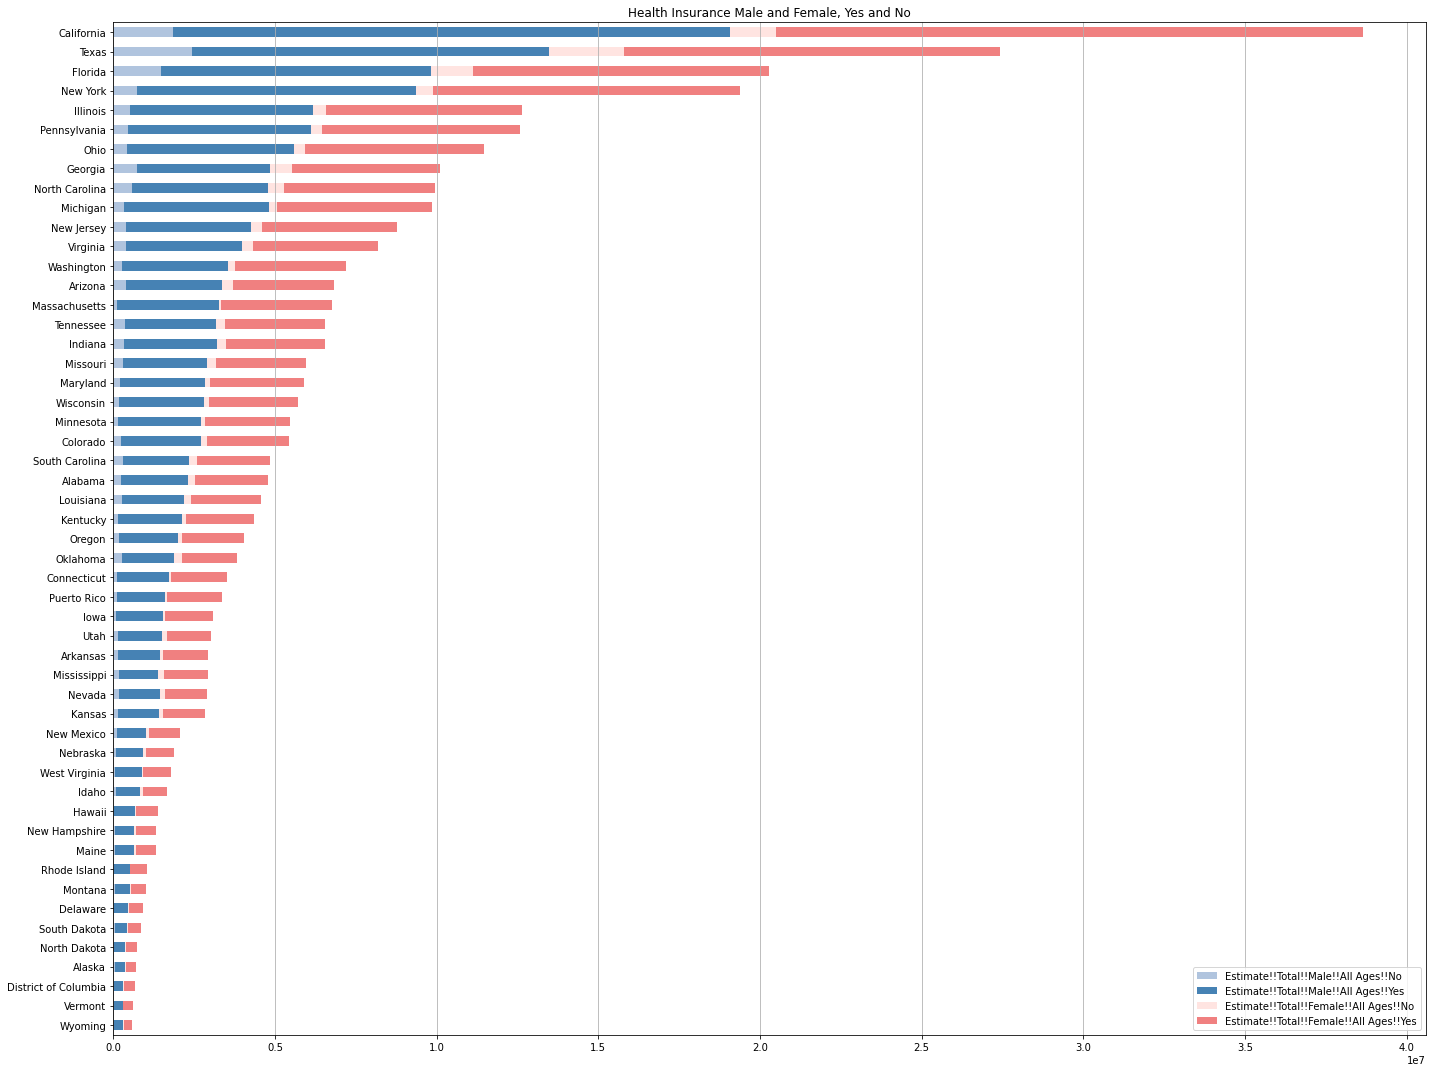

In [105]:
all_male_no = 'Estimate!!Total!!Male!!All Ages!!No'
all_male_yes = 'Estimate!!Total!!Male!!All Ages!!Yes'
all_female_no = 'Estimate!!Total!!Female!!All Ages!!No'
all_female_yes = 'Estimate!!Total!!Female!!All Ages!!Yes'
x_axis = HealthIns_covid_data_clean.index 
colors = ['lightsteelblue', 'steelblue', 'mistyrose', 'lightcoral','seagreen', 'gold' ]

HealthIns_covid_data_clean.plot(kind='barh', y = [all_male_no, all_male_yes, all_female_no, all_female_yes ], 
                                 figsize=(20,15), color=colors, stacked=True)

plt.yticks(x_axis, HealthIns_covid_data_clean['NAME'])
plt.grid(b=None, which='major', axis='x')
plt.title("Health Insurance Male and Female, Yes and No")
plt.tight_layout()

plt.savefig(os.path.join("HealthInsSex.png"))
# plt.figure(figsize=(20,25))
# plt.barh(y=x_axis, width=[HealthIns_covid_data_clean['Estimate!!Total!!Female!!All Ages!!No'], HealthIns_covid_data_clean['Estimate!!Total!!Female!!All Ages!!Yes']], color="purple", alpha=0.5, align="center")
